### Packages Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pymannkendall as mk
from scipy.stats import theilslopes 
from matplotlib.offsetbox import AnchoredText

### Create three year pre- and post- fire CI

In [4]:
# Watersheds and area
Watersheds=['Chilko','Chilcotin','Osilinka','Mesilinka','Stellako','Nautley'] #['Spius','Nation']
Area=[6800,19200,1950,3060,4020,6552]#[775,6790]
Seasons=['A','Sp','Su','F','W']

#loop through the seasons
for S in Seasons:
    Climate_Index=[]; Fire_Index=[];Fire_ECA=[]; Runoff=[];Data_Span=[];FY=[];WS_ARRAY=[];Precip=[]
    
    #loop through the watersheds
    for count, WS in enumerate(Watersheds):
        
        #load the climate and fire summary data
        CI= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/ERA5_land_Climate_Index.xlsx', sheet_name=WS)
        ECA = pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)
    
        #extract years where fire  bruned >5% area
        Fire_Year= ECA[(ECA.Percent>=5)].Year.values

        
        #mean runoff and Standard deviation of runoff
        Avg_Run=np.nanmean(CI[(CI.Season=='A')].Obs_Runoff.values)
        SD_Run=np.nanstd(CI[(CI.Season=='A')].Obs_Runoff.values)
        
        # for year fire year in the watershed
        if len(Fire_Year)>0:
            for yc in Fire_Year:
                
                #climate index +3 and -3 years from forest fire year
                Climate_Index.append((CI[(CI.Season==S)&((CI.Year>=yc-3)&(CI.Year<=yc+3))].NPA-
                                      CI[(CI.Season==S) & ((CI.Year>=yc-3)&(CI.Year<=yc+3))].NTA).values)
                
                #NPA +3 and -3 years from forest fire year
                Precip.append(CI[(CI.Season==S)&((CI.Year>=yc-3)&(CI.Year<=yc+3))].NPA.values)
                
                #Fire year
                FY.append(yc)
                
                #fire size
                Fire_ECA.append(ECA[ECA.Year==yc].Percent.values[0])
                
                #Normlaized Runoff anomaly
                Runoff.append((CI[(CI.Season=='A')&((CI.Year>=yc-3)&(CI.Year<=yc+3))].Obs_Runoff.values-Avg_Run)/SD_Run)
                
                #dates of +3 and -3 from fire year
                Data_Span.append(CI[(CI.Season=='A')&((CI.Year>=yc-3)&(CI.Year<=yc+3))].Year.values)

                #save watershed name
                WS_ARRAY.append(WS)
    
    #create +3 to -3  year summary of climate and runoff
    if S=='W':
        R_Winter= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='A':
        R_Annual= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='Sp':
        R_Spring= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='Su':
        R_Summer= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})
    elif S=='F':
        R_Fall= pd.DataFrame({'Fire_Year':FY,'WS':WS_ARRAY,'Fire_ECA':Fire_ECA,'Precip':Precip,
                      'CI+-3yr':Climate_Index,'Runoff+-3yr':Runoff,'DataSpan':Data_Span})

### Calculate yearly normalized runoff/precip anomaly 

In [9]:
#Watersheds
Watersheds=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']

#initilize dataframes for each season
Results_Diff=pd.DataFrame(); Results_Summer=pd.DataFrame(); Results_Fall=pd.DataFrame(); Results_Spring=pd.DataFrame()

#loop through watersheds
for WS in Watersheds:
    Precip_TB= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/Summary_ERA5_land_Monthly_ALL.xlsx', sheet_name=WS)

    Precip=[];Runoff=[];Precip_S=[];Runoff_S=[];Precip_Sp=[];Runoff_Sp=[];Precip_F=[];Runoff_F=[]
    for year in np.arange(1982,2020):
        
        # not all watersheds have 2019 data (will place a NAN in the 2019 data)
        if year ==2019:
            if WS in ['Spius','Chilko','Nation','Osilinka','Mesilinka']:
                Precip.append(np.nan); Runoff.append(np.nan)
                Precip_S.append(np.nan); Runoff_S.append(np.nan)
                Precip_Sp.append(np.nan); Runoff_Sp.append(np.nan)
                Precip_F.append(np.nan); Runoff_F.append(np.nan)
                continue
          
        #calculate water year precip and runoff
        Precip.append(np.sum(Precip_TB[((Precip_TB.Year==year) & (Precip_TB.Month<10))|
                                       ((Precip_TB.Year==year-1) & (Precip_TB.Month>=10))]['Avg Precip']))
        Runoff.append(np.sum(Precip_TB[((Precip_TB.Year==year) & (Precip_TB.Month<10))|
                                       ((Precip_TB.Year==year-1) & (Precip_TB.Month>=10))]['Discharge_obs']))
        
        #calculate fall precip and runoff
        Precip_F.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==9)|(Precip_TB.Month==10)|
                                                                  (Precip_TB.Month==11))]['Avg Precip']))
        Runoff_F.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==9)|(Precip_TB.Month==10)|
                                                                  (Precip_TB.Month==11))]['Discharge_obs']))
        
        #calculate spring precip and runoff
        Precip_Sp.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==3)|(Precip_TB.Month==4)|
                                                                  (Precip_TB.Month==5))]['Avg Precip']))
        Runoff_Sp.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==3)|(Precip_TB.Month==4)|
                                                                  (Precip_TB.Month==5))]['Discharge_obs']))
        
        #calculate summer precip and runoff
        Precip_S.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==6)|(Precip_TB.Month==7)|
                                                                  (Precip_TB.Month==8))]['Avg Precip']))
        Runoff_S.append(np.sum(Precip_TB[(Precip_TB.Year==year) & ((Precip_TB.Month==6)|(Precip_TB.Month==7)|
                                                                  (Precip_TB.Month==8))]['Discharge_obs']))
    #convert lists to arrays
    Precip=np.array(Precip); Runoff=np.array(Runoff)
    Precip_S=np.array(Precip_S); Runoff_S=np.array(Runoff_S)
    Precip_Sp=np.array(Precip_Sp); Runoff_Sp=np.array(Runoff_Sp)
    Precip_F=np.array(Precip_F); Runoff_F=np.array(Runoff_F)

    #calculate normalized R/P anomaly for each season
    Diff_Index= ((Runoff/Precip)-np.nanmean(Runoff/Precip))/np.nanstd(Runoff/Precip)
    Sum_Index= ((Runoff_S/Precip_S)-np.nanmean(Runoff_S/Precip_S))/np.nanstd(Runoff_S/Precip_S)
    Fall_Index= ((Runoff_F/Precip_F)-np.nanmean(Runoff_F/Precip_F))/np.nanstd(Runoff_F/Precip_F)
    Sp_Index= ((Runoff_Sp/Precip_Sp)-np.nanmean(Runoff_Sp/Precip_Sp))/np.nanstd(Runoff_Sp/Precip_Sp)
    
    #calculate normalized precipitation anomaly for each season
    Diff_NPA= (Precip-np.nanmean(Precip))/np.nanstd(Precip)
    Sum_NPA= (Precip_S-np.nanmean(Precip_S))/np.nanstd(Precip_S)
    Fall_NPA= (Precip_F-np.nanmean(Precip_F))/np.nanstd(Precip_F)
    Sp_NPA= (Precip_Sp-np.nanmean(Precip_Sp))/np.nanstd(Precip_Sp)

    #save the results for each season
    Results_Diff= Results_Diff.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Diff_Index, 'NPA':Diff_NPA},ignore_index=True)
    Results_Summer=Results_Summer.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Sum_Index,'NPA':Sum_NPA},ignore_index=True)
    Results_Fall=Results_Fall.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Fall_Index,'NPA':Fall_NPA},ignore_index=True)    
    Results_Spring=Results_Spring.append({'WS':WS,'Year':np.arange(1982,2020),'Run-Precip_IDX':Sp_Index,'NPA':Sp_NPA},ignore_index=True)

### Identifying extreme R/P values prior to and after forest fires

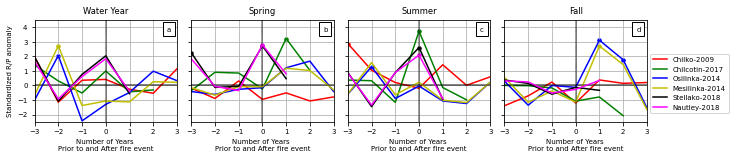

In [18]:
Seasons=[Results_Diff,Results_Spring,Results_Summer,Results_Fall]
Names=['Water Year','Spring', 'Summer','Fall']

#Extract Fire year, watershed, and percent burned
R=R_Summer
FI_year=R.Fire_Year.values
FI_WS=R.WS.values
FI_Percent=R.Fire_ECA.values

#How many fire years there are
FI=len(FI_year)

#------------------------------------------- initiate plotting------------------------------------------
def cm2inch(*tupl):### plots in cm 
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
Color=['r','g','b','y','k','magenta']
L=['a','b','c','d']

fig,ax=plt.subplots(1,4,figsize=cm2inch(27,6),sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.3, top=0.9, hspace=0.15, left=0.05, right=0.85, wspace=0.1)

font = {'family' : 'sans-serif', 'weight' : 'normal',  'size'   : 7}
plt.rc('font', **font)

xi=[0,0,0,0,1,1,1,1]
yi=[0,1,2,3,0,1,2,3]

#---------------------------------------Runoff analysis------------------------------------------------
#loop through seasons
for I,S in enumerate(Seasons):
    
    #loop through watersheds with forest fires
    for count,WS in enumerate(FI_WS):
        Year= FI_year[count]

        #select the +3 to-3 years of forest fire
        Working_Y= S[S.WS==WS].Year.values[0]
        IX= np.where((Working_Y<=Year+3)&(Working_Y>=Year-3))
        
        #extract the 95% of runoff/precip index threshold --> representing maximum
        Max= np.nanquantile(S[S.WS==WS]['Run-Precip_IDX'].values[0],0.95)
        
        #extract runoff/precip index
        Working_D = S[S.WS==WS]['Run-Precip_IDX'].values[0]

        Span=np.arange(-3,-3+len(IX[0]))
        
        #plot +3 to -3 years of R/P index
        ax[I].plot(Span,Working_D[IX],linewidth=1.5, color=Color[count],label='%s-%s'%(WS,Year))
        
        #determine if any points exceed the 95% of R/P index values
        High= np.where(Working_D[IX]>=Max)
        
        #if R/P  exceeds 95%, then plot them as points on plot
        if len(High)>0:
            for H in High:
                ax[I].scatter(Span[H],Working_D[IX][H],color=Color[count],s=12)
        

        #-----------------------------------Plotting constraints---------------------------
        ax[I].set_xlim(-3,3)
        ax[I].set_ylim(-2.5,4.5)
        ax[I].set_title('%s'%Names[I])
        ax[I].axvline(0, color='k',linestyle='--', linewidth=0.2)
        ax[I].axhline(0, color='k',linewidth=0.2)
        ax[I].grid(b=True,axis='both')
        
        if I==0:
            ax[I].set_ylabel('Standardized R/P anomaly')
       
        ax[I].set_xlabel('Number of Years \nPrior to and After fire event')
        if I==3:
            ax[I].legend(bbox_to_anchor=(1,.7),)
        
            
    at = AnchoredText(L[I], frameon=True, loc='upper right')
    at.patch.set_boxstyle("Square,pad=0.15")
    ax[I].add_artist(at)
    
      
Path_Figs='C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/'
# fig.savefig(Path_Figs+'Figure4.pdf',dpi=700)

### Extreme R/P events compared to precipitation

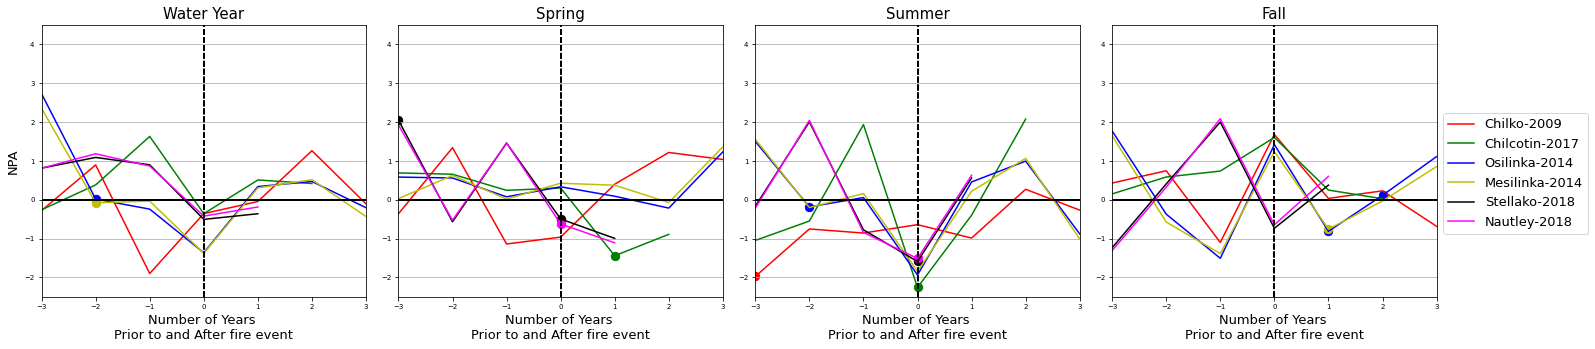

In [23]:
# Extract fire year,watersheds, and area burned data
R=R_Summer
FI_year=R.Fire_Year.values
FI_WS=R.WS.values
FI_Percent=R.Fire_ECA.values

#Number of forest fires
FI=len(FI_year)

#arrays to loop through
Seasons=[Results_Diff,Results_Spring,Results_Summer,Results_Fall]
RUN=[R_Annual, R_Spring, R_Summer,R_Fall]
Names=['Water Year','Spring', 'Summer','Fall']

#--------------------------------------Initilize plotting-----------------------
Color=['r','g','b','y','k','magenta']

fig,ax=plt.subplots(1,4,figsize=(25,5))
fig.subplots_adjust(hspace=.2,wspace=0.1)
xi=[0,0,0,0,1,1,1,1]
yi=[0,1,2,3,0,1,2,3]



for I,S in enumerate(Seasons):
    
    #select the results
    R=RUN[I]
    
    #loop through watersheds
    for count,WS in enumerate(FI_WS):
        Year= FI_year[count]
        
        #select three years before and after forest fires
        Working_Y= S[S.WS==WS].Year.values[0]
        IX= np.where((Working_Y<=Year+3)&(Working_Y>=Year-3))
        
        #select NPA data from results
        Working_D = R[R.WS==WS]['Precip'].values[0]
        
        #determine the 95% of the R/P index values 
        Max= np.nanquantile(S[S.WS==WS]['Run-Precip_IDX'].values[0],0.95)
        
        
        # plot the NPA data for the three years before and after the forest fire
        Span=np.arange(-3,-3+len(IX[0]))
        ax[I].plot(Span,Working_D,linewidth=1.5, color=Color[count],label='%s-%s'%(WS,Year))
        
        #Extract R/P index that exceeded the 95%
        High= np.where(S[S.WS==WS]['Run-Precip_IDX'].values[0][IX]>=Max)
        
        #put a dot on any precip values where, during the same year,R/P index exceeded the 95%
        if len(High)>0:
            for H in High:
                ax[I].scatter(Span[H],Working_D[H],color=Color[count],s=70)
            

        #----------------------------- plotting parameters-------------------------
        ax[I].set_xlim(-3,3)
        ax[I].set_ylim(-2.5,4.5)
        ax[I].set_title('%s'%Names[I],size=15)
        ax[I].axvline(0, color='k',linestyle='--')
        ax[I].axhline(0, color='k')
        ax[I].grid(b=True,axis='y')


        if I==0:
            ax[I].set_ylabel('NPA',fontsize=13)
       
        ax[I].set_xlabel('Number of Years \nPrior to and After fire event', fontsize=13)
        if I==3:
            ax[I].legend(bbox_to_anchor=(1,.7),prop={'size': 13})
    
   

### R/P with precipitation events

In [11]:
from scipy.optimize import curve_fit
def line_fit(xdata,ydata,x,y,power):
    "Calculates a line of best fit for different polynomical powers"
    xtry=np.linspace(-5,5,100)
    if power==2:
        def func(x, a, b, c):
            return a*(x**2)+b*x+c
        popt, pcov = curve_fit(func, xdata, ydata)
        ax[x,y].plot(xtry, func(xtry, *popt))
        residuals = ydata - func(xdata, popt[0], popt[1],popt[2])
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)
        r_squared=  1 - (ss_res / (ss_tot))
        
    if power==1:
        def func(x, a, b):
            return a*x+b
        popt, pcov = curve_fit(func, xdata, ydata)
        
        ax[x,y].plot(xtry, func(xtry, *popt))
        
        residuals = ydata - func(xdata, popt[0], popt[1])
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)
        r_squared=  1 - (ss_res / (ss_tot))
        
    return r_squared

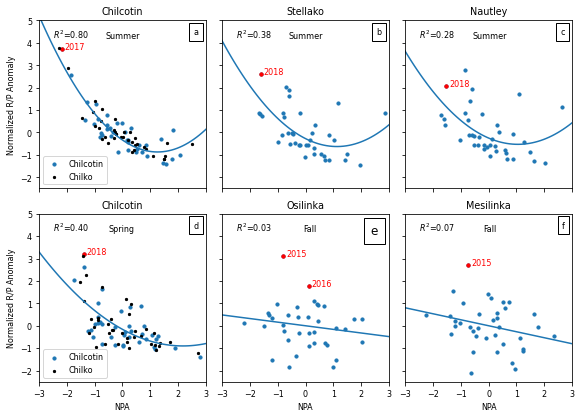

In [12]:

#--------------------------------plotting initiation--------------------------------
xi=[0,0,0,1,1,1]
yi=[0,1,2,0,1,2]

def cm2inch(*tupl):### plots in cm 
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
fig,ax=plt.subplots(2,3,figsize=cm2inch(20,15),sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.15, left=0.05, right=0.99, wspace=0.1)

font = {'family' : 'sans-serif', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)
L=['a','b','c','d','e','f']


c=0
perr=[];r_squared=[]

#loops through each season that has an extreme R/P event
for Season in ['Summer','Spring','Fall']:
    
    #choose the correct working dataset based on season
    if Season=='Summer':
        Working=Results_Summer
    elif Season=='Spring':
        Working=Results_Spring
    elif Season=='Fall':
        Working=Results_Fall
    elif Season=='Annual':
        Working=Results_Diff
    
    # Summer R/P events
    if Season=='Summer':
        x=0;y=0
        
        #watersheds with extreme events during the summer
        for WS in ['Chilcotin','Stellako','Nautley']:
           
            if WS=='Chilcotin':
            
                W=Working[Working.WS==WS]
                
                #plot NPA vs R/P
                ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=10, label='Chilcotin')

                #sort data and determine line of best fit
                Pan =pd.DataFrame({'NPA':W.NPA.values[0],'Run':W['Run-Precip_IDX'].values[0]})
                Pan= Pan.sort_values(['NPA'],ascending=[True])
                xdata=Pan.NPA.values;ydata=Pan.Run.values
                r_squared=(line_fit(xdata,ydata,x,y,power=2))
                ax[x,y].annotate('$R^2$=%0.2f'%r_squared,(-2.5,4.2), xycoords='data', color='k')
                
                # set plotting parameters
                ax[x,y].set_title(WS)
                if x==1:
                    ax[x,y].set_xlabel('NPA')
                if y==0:
                    ax[x,y].set_ylabel('Normalized R/P Anomaly')
                ax[x,y].set_xlim(-3,3)
                ax[x,y].set_ylim(-2.5,5)
                

                #add in the extreme R/P event
                Peak=2017
                T= Results_Summer[Results_Summer.WS=='Chilcotin']['Year'].values[0]
                loc= np.where(T==Peak)[0]
                Run= Results_Summer[Results_Summer.WS=='Chilcotin']['Run-Precip_IDX'].values[0][loc]
                N= Results_Summer[Results_Summer.WS=='Chilcotin']['NPA'].values[0][loc]
                ax[x,y].scatter(N, Run, color='r',s=11)
                
                #set plotting parameters 
                ax[x,y].annotate(Peak,(N+0.1,Run), xycoords='data', color='r')
                at = AnchoredText('a', frameon=True, loc='upper right')
                at.patch.set_boxstyle("Square,pad=0.15")
                ax[x,y].add_artist(at)
                ax[x,y].annotate(Season,(-0.6,4.2), xycoords='data', color='k')
                
                #add chilko for comparison (since Chilko is a sub basin of the Chilcotin)
                W=Working[Working.WS=='Chilko']
                ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=5,facecolor='k', label='Chilko')
                ax[x,y].legend(loc='lower left')
                y=y+1
       

            if WS=='Stellako':
                
                W=Working[Working.WS==WS]
                
                #plot NPA vs R/P 
                ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=10)
                
                #plotting parameters
                ax[x,y].set_title(WS)
                if x==1:
                    ax[x,y].set_xlabel('NPA')
                if y==0:
                    ax[x,y].set_ylabel('Normalized R/P Anomaly')
                ax[x,y].set_xlim(-3,3)
                ax[x,y].set_ylim(-2.5,5)
                
                #sort data and determine line of best fit
                Pan =pd.DataFrame({'NPA':W.NPA.values[0],'Run':W['Run-Precip_IDX'].values[0]})
                Pan= Pan.sort_values(['NPA'],ascending=[True])
                xdata=Pan.NPA.values;ydata=Pan.Run.values
                r_squared=(line_fit(xdata,ydata,x,y,power=2))
                ax[x,y].annotate('$R^2$=%0.2f'%r_squared,(-2.5,4.2), xycoords='data', color='k')
                
                #add in the extreme R/P event
                Peak=2018
                T= Results_Summer[Results_Summer.WS==WS]['Year'].values[0]
                loc= np.where(T==Peak)[0]
                Run= Results_Summer[Results_Summer.WS==WS]['Run-Precip_IDX'].values[0][loc]
                N= Results_Summer[Results_Summer.WS==WS]['NPA'].values[0][loc]
                ax[x,y].scatter(N, Run, color='r',s=11)
                
                # Plotting Parameters
                ax[x,y].annotate(Peak,(N+0.1,Run), xycoords='data', color='r')
                at = AnchoredText('b', frameon=True, loc='upper right')
                at.patch.set_boxstyle("Square,pad=0.15")
                ax[x,y].add_artist(at)
                ax[x,y].annotate(Season,(-0.6,4.2), xycoords='data', color='k')
                y=y+1

            if WS=='Nautley':
                W=Working[Working.WS==WS]
                
                #plot NPA vs R/P
                ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=10)
                
                #set plotting parameters
                ax[x,y].set_title(WS)
                if x==1:
                    ax[x,y].set_xlabel('NPA')
                if y==0:
                    ax[x,y].set_ylabel('Normalized R/P Anomaly')
                ax[x,y].set_xlim(-3,3)
                ax[x,y].set_ylim(-2.5,5)
                
                #sort data and determine line of best fit
                Pan =pd.DataFrame({'NPA':W.NPA.values[0],'Run':W['Run-Precip_IDX'].values[0]})
                Pan= Pan.sort_values(['NPA'],ascending=[True])
                xdata=Pan.NPA.values;ydata=Pan.Run.values
                r_squared=(line_fit(xdata,ydata,x,y,power=2))
                ax[x,y].annotate('$R^2$=%0.2f'%r_squared,(-2.5,4.2), xycoords='data', color='k')
                
                #add in extreme R/P event
                Peak=2018
                T= Results_Summer[Results_Summer.WS==WS]['Year'].values[0]
                loc= np.where(T==Peak)[0]
                Run= Results_Summer[Results_Summer.WS==WS]['Run-Precip_IDX'].values[0][loc]
                N= Results_Summer[Results_Summer.WS==WS]['NPA'].values[0][loc]
                ax[x,y].scatter(N,Run, color='r',s=11)
                
                #plotting parameters
                ax[x,y].annotate(Peak,(N+0.1,Run), xycoords='data', color='r')
                at = AnchoredText('c', frameon=True, loc='upper right')
                at.patch.set_boxstyle("Square,pad=0.15")
                ax[x,y].add_artist(at)
                ax[x,y].annotate(Season,(-0.6,4.2), xycoords='data', color='k')
                y=y+1
            
    if Season=='Spring':
        x=1;y=0
        Peak=2018
        
        # only watershed with an extreme R/P value during spring
        WS='Chilcotin'
        
        W=Working[Working.WS==WS]
        
        #plot NPA vs R/P
        ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=10,label='Chilcotin')
        
        #set plotting parameter
        ax[x,y].set_title(WS)
        if x==1:
            ax[x,y].set_xlabel('NPA')
        if y==0:
            ax[x,y].set_ylabel('Normalized R/P Anomaly')
        ax[x,y].set_xlim(-3,3)
        ax[x,y].set_ylim(-2.5,5)
        
        #sort data and determine line of best fit
        Pan =pd.DataFrame({'NPA':W.NPA.values[0],'Run':W['Run-Precip_IDX'].values[0]})
        Pan= Pan.sort_values(['NPA'],ascending=[True])
        xdata=Pan.NPA.values;ydata=Pan.Run.values
        r_squared=(line_fit(xdata,ydata,x,y,power=2))
        ax[x,y].annotate('$R^2$=%0.2f'%r_squared,(-2.5,4.2), xycoords='data', color='k')
        
        # plot the extreme R/P event
        T= Results_Spring[Results_Spring.WS=='Chilcotin']['Year'].values[0]
        loc= np.where(T==Peak)[0]
        Run= Results_Spring[Results_Spring.WS=='Chilcotin']['Run-Precip_IDX'].values[0][loc]
        N= Results_Spring[Results_Spring.WS=='Chilcotin']['NPA'].values[0][loc]
        ax[x,y].scatter(N,Run, color='r',s=11)
        
        # set plotting parameters
        ax[x,y].annotate(Peak,(N+0.1,Run), xycoords='data', color='r')
        at = AnchoredText('d', frameon=True, loc='upper right')
        at.patch.set_boxstyle("Square,pad=0.15")
        ax[x,y].add_artist(at)
        ax[x,y].annotate(Season,(-0.5,4.2), xycoords='data', color='k')

        #plot Chilko for comparison (since the Chilko is a subbasin of the Chilcotin)
        W=Working[Working.WS=='Chilko']
        ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=5,facecolor='k',label='Chilko')
        ax[x,y].legend(loc='lower left')
    
    if Season=='Fall':
        x=1;y=1
        
        #watersheds with extreme R/P events in the fall
        for WS in ['Osilinka','Mesilinka']:
            
            if WS=='Osilinka':
                W=Working[Working.WS==WS]
                
                #plot NPA vs R/P
                ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=10)
                
                #plotting parameters
                ax[x,y].set_title(WS)
                if x==1:
                    ax[x,y].set_xlabel('NPA')
                if y==0:
                    ax[x,y].set_ylabel('Normalized R/P Anomaly')
                ax[x,y].set_xlim(-3,3)
                ax[x,y].set_ylim(-2.5,5)
                
                #sort data and determine line of best fit
                Pan =pd.DataFrame({'NPA':W.NPA.values[0],'Run':W['Run-Precip_IDX'].values[0]})
                Pan= Pan.sort_values(['NPA'],ascending=[True])
                xdata=Pan.NPA.values[:-1];ydata=Pan.Run.values[:-1]
                r_squared=(line_fit(xdata,ydata,x,y,power=1))
                ax[x,y].annotate('$R^2$=%0.2f'%r_squared,(-2.5,4.2), xycoords='data', color='k')
                
                # plot the peak R/P values (this watershed has two)
                for Peak in [2015,2016]:
                    T= Results_Fall[Results_Fall.WS==WS]['Year'].values[0]
                    loc= np.where(T==Peak)[0]
                    Run= Results_Fall[Results_Fall.WS==WS]['Run-Precip_IDX'].values[0][loc]
                    N= Results_Fall[Results_Fall.WS==WS]['NPA'].values[0][loc]
                    ax[x,y].scatter(N, Run, color='r',s=11)
                    ax[x,y].annotate(Peak,(N+0.1,Run), xycoords='data', color='r')
                    
                #plotting parameters
                at = AnchoredText('e', prop=dict(size=12), frameon=True, loc='upper right')
                at.patch.set_boxstyle("Square,pad=0.15")
                ax[x,y].add_artist(at)
                ax[x,y].annotate(Season,(-0.1,4.2), xycoords='data', color='k')
                y=y+1

            if WS=='Mesilinka':
                
                W=Working[Working.WS==WS]
                
                #plot NPA vs R/P
                ax[x,y].scatter(W.NPA.values[0],W['Run-Precip_IDX'].values[0],s=10)
                
                #plotting parameters
                ax[x,y].set_title(WS)
                if x==1:
                    ax[x,y].set_xlabel('NPA')
                if y==0:
                    ax[x,y].set_ylabel('Normalized R/P Anomaly')
                ax[x,y].set_xlim(-3,3)
                ax[x,y].set_ylim(-2.5,5)
                
                #sort data and determine line of best fit
                Pan =pd.DataFrame({'NPA':W.NPA.values[0],'Run':W['Run-Precip_IDX'].values[0]})
                Pan= Pan.sort_values(['NPA'],ascending=[True])
                xdata=Pan.NPA.values[:-1];ydata=Pan.Run.values[:-1]
                r_squared=(line_fit(xdata,ydata,x,y,power=1))
                ax[x,y].annotate('$R^2$=%0.2f'%r_squared,(-2.5,4.2), xycoords='data', color='k')
                
                #plot extreme R/P value
                Peak=2015
                T= Results_Fall[Results_Fall.WS==WS]['Year'].values[0]
                loc= np.where(T==Peak)[0]
                Run= Results_Fall[Results_Fall.WS==WS]['Run-Precip_IDX'].values[0][loc]
                N= Results_Fall[Results_Fall.WS==WS]['NPA'].values[0][loc]
                ax[x,y].scatter(N,Run, color='r',s=11)
                
                #plotting parameters
                ax[x,y].annotate(Peak,(N+0.1,Run), xycoords='data', color='r')
                at = AnchoredText('f', frameon=True, loc='upper right')
                at.patch.set_boxstyle("Square,pad=0.15")
                ax[x,y].add_artist(at)
                ax[x,y].annotate(Season,(-0.2,4.2), xycoords='data', color='k')

#saving the figure
Path_Figs='C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/'
fig.savefig(Path_Figs+'Figure5.pdf',dpi=700)